# T-coil
Last update: 13 Feb 2024  

## Abstract {.unnumbered}

## Introduction

@fig-t-coil1

@fig-t-coil2

@fig-t-coil3

@fig-t-coil4

@williams1991, art of analog design

@Jeong2020, bandwidth extension, IC design 

@Razavi2015, IEEE article

@Ross2011, slide show presentation

patents  

@lin2015

@fan2020

## Circuit 1

![T coil ver 1](T-coil-ver1.png){#fig-t-coil1}  


![T coil ver 1a](T-coil-ver1a.png){#fig-t-coil1a}  

From: @williams1991

>These new amplifiers had rise times comparable to the propagation time between stages, so it became important to eliminate reflections between stages. The bridged T coil became extremely important because it allowed the input of each stage to be very well terminated. The F1, doubler's simple high frequency input impedance could be well modeled with a series RLC. Bob Ross wrote the equations for the asymmetrical bridged T coil which could peak a series RLC load. The derivation Figure 14-6. is quite complex, and the equations were held as a trade secret until recently. The F1, doubler and the bridged T coil were used extensively in the Tektronix 7904 introduced in 1972. 

Equations from figure 14-6


$\theta = \tan^1 \sqrt {\frac {1}{\zeta ^2} - 1}$

$\zeta = \frac {1}{\sqrt {\tan^2 \theta +1}}$


$L_1 = \frac {C_L}{4} \left[ 1+\frac{1}{4\zeta^2} \right] \left[ R_L+R_S\right]^2 - R_L R_S C_L - L_S$

$L_2 = \frac {C_L}{4} \left[ 1+\frac{1}{4\zeta^2} \right] \left[ R_L+R_S\right]^2 - L_S$

$L_T = R_L^2 C_L$

$M = \frac{C_L}{4} \left[ R_L^2 - R_S^2 - \frac {1}{4 \zeta ^2} \left[ R_L+R_S\right]^2 \right] + L_S$


$C_B = \frac{C_L}{16 \zeta^2} \left[ \frac {R_L+R_S}{R_L} \right]^2$

$s = \frac{-4\zeta^2}{(R_L+R_S) C_L} \pm j \frac {4\zeta}{(R_L+R_S) C_L} \sqrt {1-\zeta^2}$

$L_1 + M = \frac{R_L C_L}{2} \left[ R_L - R_S \right]$

$L_2 + M = \frac{R_L C_L}{2} \left[ R_L + R_S \right]$



SymPy derived equations

From: @Ross2011

T-coil summary

- Constant R provides ideal load or termination
- Up to 2.82 bandwidth improvement (BWER or bandwidth extension ratio) over RC based bandwidth
- 2.73 improvement for acceptable 0.4% overshoot to ideal step input (MFED or maximally flat envelope delay design)
- Now used in high-speed buffer design
  - ESD (electrostatic discharge) compensation
  - Bandwidth improvement

Schematic somewhat different

Wang Algebra

See page 12 for constant R and simplification


From: @Jeong2020

Topics in IC Design T-Coil

- Inductors produce peaking, thereby giving bandwidth extension.
- T-coil (Tee-Coil) produces even more bandwidth extension by giving negative inductance.

Introduced by Ginzton in 1948 as part of distributed amplifier.

Common Source Amplifier

Given RD and CL, what are CB, L, and M, assuming L1 = L2 = L (symmetric T-Coil)?

Four equations must be satisfied with five variables (CB, L, M, $\zeta$, $\omega _n$). Out of numerous solutions, what is the best transfer function that maximizes the bandwidth?


Effect of Large ESD Capacitance is removed.

E. Ginzton et. al, “Distributed Amplification,” Proc. IRE, vol. 36, pp. 956–969, Aug.
1948.


```
* C:\users\jeff64\My Documents\T-Coil\T-Coil-ver1.asc
V1 1 0 1
L1 2 1 1 Rser=0
L2 3 2 1 Rser=0
L3 2 4 1 Rser=0
C1 5 0 1
C2 3 1 1
R1 3 0 1
R2 4 5 1
K1 L1 L2 0.5
.op
.backanno
.end

```

## Circuit description

- write for each configuration   
- The circuit in @fig-t-coil1 has 10 branches and eight nodes. 



There are two capacitors, seven resistors in the circuit and three Op Amps. The circuit has a low pass, a high pass and band pass outputs.

## Circuit analysis
The circuit was drawn using LTSpice and the netlist was pasted into the code. Network equations were generated using the smna() function and a symbolic solution for the equations was obtained. 

- two port parameters
- design equations: given some values (C_L, R_L, ), what other values increase BW?


 

The net list for the filter is:
```
* T-Coil-ver1.asc
V1 1 0 1
L1 2 1 1 Rser=0
L2 3 2 1 Rser=0
L3 2 4 1 Rser=0
C1 5 0 1
C2 3 1 1
R1 3 0 1
R2 4 5 1
K1 L1 L2 0.5
.op
.backanno
.end
```

The following Python modules are used.

In [1]:
from sympy import *
import numpy as np
from tabulate import tabulate
import pandas as pd
import matplotlib.pyplot as plt
import SymMNA
from IPython.display import display, Markdown, Math, Latex
init_printing()

In [2]:
t = symbols('t',positive=True)  # t > 0

### Load the netlist
The netlist generated by LTSpice is pasted into the cell below and some edits were made to remove the inductor series resistance and the independent sources are set to their DC values.

In [73]:
net_list1 = '''
V1 1 0 1
L1 2 1 1 
L2 3 2 1 
L_S 2 4 1 
C_L 5 0 1
C_B 3 1 1
R_L 3 0 1
R_S 4 5 1
K1 L1 L2 0.5
'''

Generate the network equations.

In [74]:
report, network1_df, network1_df2, A, X, Z = SymMNA.smna(net_list1)

# Put matricies into SymPy 
X = Matrix(X)
Z = Matrix(Z)

NE1_sym = Eq(A*X,Z)

Generate markdown text to display the network equations.

In [75]:
temp = ''
for i in range(len(X)):
    temp += '${:s}$<br>'.format(latex(Eq((A*X)[i:i+1][0],Z[i])))

Markdown(temp)

$C_{b} s v_{1} - C_{b} s v_{3} - I_{L1} + I_{V1} = 0$<br>$I_{L1} - I_{L2} + I_{L s} = 0$<br>$- C_{b} s v_{1} + I_{L2} + v_{3} \left(C_{b} s + \frac{1}{R_{l}}\right) = 0$<br>$- I_{L s} + \frac{v_{4}}{R_{s}} - \frac{v_{5}}{R_{s}} = 0$<br>$v_{5} \left(C_{l} s + \frac{1}{R_{s}}\right) - \frac{v_{4}}{R_{s}} = 0$<br>$v_{1} = V_{1}$<br>$- I_{L1} L_{1} s - I_{L2} M_{1} s - v_{1} + v_{2} = 0$<br>$- I_{L1} M_{1} s - I_{L2} L_{2} s - v_{2} + v_{3} = 0$<br>$- I_{L s} L_{s} s + v_{2} - v_{4} = 0$<br>

As shown above MNA generated many equations and these would be difficult to solve by hand and a symbolic soultion would take a lot of computing time. The equations are displace in matrix notation.

In [76]:
NE1_sym

⎡C_b⋅s⋅v₁ - C_b⋅s⋅v₃ - I_L1 + I_V1 ⎤       
⎢                                  ⎥       
⎢       I_L1 - I_L2 + I_L_s        ⎥       
⎢                                  ⎥   ⎡0 ⎤
⎢                      ⎛        1 ⎞⎥   ⎢  ⎥
⎢-C_b⋅s⋅v₁ + I_L2 + v₃⋅⎜C_b⋅s + ──⎟⎥   ⎢0 ⎥
⎢                      ⎝        Rₗ⎠⎥   ⎢  ⎥
⎢                                  ⎥   ⎢0 ⎥
⎢                  v₄   v₅         ⎥   ⎢  ⎥
⎢         -I_L_s + ── - ──         ⎥   ⎢0 ⎥
⎢                  Rₛ   Rₛ         ⎥   ⎢  ⎥
⎢                                  ⎥ = ⎢0 ⎥
⎢          ⎛       1 ⎞   v₄        ⎥   ⎢  ⎥
⎢       v₅⋅⎜Cₗ⋅s + ──⎟ - ──        ⎥   ⎢V₁⎥
⎢          ⎝       Rₛ⎠   Rₛ        ⎥   ⎢  ⎥
⎢                                  ⎥   ⎢0 ⎥
⎢                v₁                ⎥   ⎢  ⎥
⎢                                  ⎥   ⎢0 ⎥
⎢ -I_L1⋅L₁⋅s - I_L2⋅M₁⋅s - v₁ + v₂ ⎥   ⎢  ⎥
⎢                                  ⎥   ⎣0 ⎦
⎢ -I_L1⋅M₁⋅s - I_L2⋅L₂⋅s - v₂ + v₃ ⎥       
⎢                                  ⎥       
⎣      -I_L_s⋅Lₛ⋅s + v₂ - v₄    

The symbols generated by the Python code are extraced by the SymPy function free_symbols and then declared as SymPy variables. 

In [77]:
# turn the free symbols into SymPy variables
var(str(NE1_sym.free_symbols).replace('{','').replace('}',''))

Built a dictionary of element values.

In [78]:
element_values = SymMNA.get_part_values(network1_df)
element_values

Generate the symbolic solution

In [79]:
U1_sym = solve(NE1_sym,X)

Display the symbolic solution

In [80]:
temp = ''
for i in U1_sym.keys():
    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U1_sym[i]))

Markdown(temp)

$v_{1} = V_{1}$<br>$v_{2} = \frac{C_{b} C_{l} L_{1} L_{s} R_{l} V_{1} s^{4} + C_{b} C_{l} L_{1} R_{l} R_{s} V_{1} s^{3} + C_{b} C_{l} L_{2} L_{s} R_{l} V_{1} s^{4} + C_{b} C_{l} L_{2} R_{l} R_{s} V_{1} s^{3} + 2 C_{b} C_{l} L_{s} M_{1} R_{l} V_{1} s^{4} + 2 C_{b} C_{l} M_{1} R_{l} R_{s} V_{1} s^{3} + C_{b} L_{1} R_{l} V_{1} s^{2} + C_{b} L_{2} R_{l} V_{1} s^{2} + 2 C_{b} M_{1} R_{l} V_{1} s^{2} + C_{l} L_{2} L_{s} V_{1} s^{3} + C_{l} L_{2} R_{s} V_{1} s^{2} + C_{l} L_{s} M_{1} V_{1} s^{3} + C_{l} L_{s} R_{l} V_{1} s^{2} + C_{l} M_{1} R_{s} V_{1} s^{2} + C_{l} R_{l} R_{s} V_{1} s + L_{2} V_{1} s + M_{1} V_{1} s + R_{l} V_{1}}{C_{b} C_{l} L_{1} L_{2} R_{l} s^{4} + C_{b} C_{l} L_{1} L_{s} R_{l} s^{4} + C_{b} C_{l} L_{1} R_{l} R_{s} s^{3} + C_{b} C_{l} L_{2} L_{s} R_{l} s^{4} + C_{b} C_{l} L_{2} R_{l} R_{s} s^{3} + 2 C_{b} C_{l} L_{s} M_{1} R_{l} s^{4} - C_{b} C_{l} M_{1}^{2} R_{l} s^{4} + 2 C_{b} C_{l} M_{1} R_{l} R_{s} s^{3} + C_{b} L_{1} R_{l} s^{2} + C_{b} L_{2} R_{l} s^{2} + 2 C_{b} M_{1} R_{l} s^{2} + C_{l} L_{1} L_{2} s^{3} + C_{l} L_{1} L_{s} s^{3} + C_{l} L_{1} R_{l} s^{2} + C_{l} L_{1} R_{s} s^{2} + C_{l} L_{2} L_{s} s^{3} + C_{l} L_{2} R_{s} s^{2} + 2 C_{l} L_{s} M_{1} s^{3} + C_{l} L_{s} R_{l} s^{2} - C_{l} M_{1}^{2} s^{3} + 2 C_{l} M_{1} R_{s} s^{2} + C_{l} R_{l} R_{s} s + L_{1} s + L_{2} s + 2 M_{1} s + R_{l}}$<br>$v_{3} = \frac{C_{b} C_{l} L_{1} L_{2} R_{l} V_{1} s^{4} + C_{b} C_{l} L_{1} L_{s} R_{l} V_{1} s^{4} + C_{b} C_{l} L_{1} R_{l} R_{s} V_{1} s^{3} + C_{b} C_{l} L_{2} L_{s} R_{l} V_{1} s^{4} + C_{b} C_{l} L_{2} R_{l} R_{s} V_{1} s^{3} + 2 C_{b} C_{l} L_{s} M_{1} R_{l} V_{1} s^{4} - C_{b} C_{l} M_{1}^{2} R_{l} V_{1} s^{4} + 2 C_{b} C_{l} M_{1} R_{l} R_{s} V_{1} s^{3} + C_{b} L_{1} R_{l} V_{1} s^{2} + C_{b} L_{2} R_{l} V_{1} s^{2} + 2 C_{b} M_{1} R_{l} V_{1} s^{2} + C_{l} L_{s} R_{l} V_{1} s^{2} - C_{l} M_{1} R_{l} V_{1} s^{2} + C_{l} R_{l} R_{s} V_{1} s + R_{l} V_{1}}{C_{b} C_{l} L_{1} L_{2} R_{l} s^{4} + C_{b} C_{l} L_{1} L_{s} R_{l} s^{4} + C_{b} C_{l} L_{1} R_{l} R_{s} s^{3} + C_{b} C_{l} L_{2} L_{s} R_{l} s^{4} + C_{b} C_{l} L_{2} R_{l} R_{s} s^{3} + 2 C_{b} C_{l} L_{s} M_{1} R_{l} s^{4} - C_{b} C_{l} M_{1}^{2} R_{l} s^{4} + 2 C_{b} C_{l} M_{1} R_{l} R_{s} s^{3} + C_{b} L_{1} R_{l} s^{2} + C_{b} L_{2} R_{l} s^{2} + 2 C_{b} M_{1} R_{l} s^{2} + C_{l} L_{1} L_{2} s^{3} + C_{l} L_{1} L_{s} s^{3} + C_{l} L_{1} R_{l} s^{2} + C_{l} L_{1} R_{s} s^{2} + C_{l} L_{2} L_{s} s^{3} + C_{l} L_{2} R_{s} s^{2} + 2 C_{l} L_{s} M_{1} s^{3} + C_{l} L_{s} R_{l} s^{2} - C_{l} M_{1}^{2} s^{3} + 2 C_{l} M_{1} R_{s} s^{2} + C_{l} R_{l} R_{s} s + L_{1} s + L_{2} s + 2 M_{1} s + R_{l}}$<br>$v_{4} = \frac{C_{b} C_{l} L_{1} R_{l} R_{s} V_{1} s^{3} + C_{b} C_{l} L_{2} R_{l} R_{s} V_{1} s^{3} + 2 C_{b} C_{l} M_{1} R_{l} R_{s} V_{1} s^{3} + C_{b} L_{1} R_{l} V_{1} s^{2} + C_{b} L_{2} R_{l} V_{1} s^{2} + 2 C_{b} M_{1} R_{l} V_{1} s^{2} + C_{l} L_{2} R_{s} V_{1} s^{2} + C_{l} M_{1} R_{s} V_{1} s^{2} + C_{l} R_{l} R_{s} V_{1} s + L_{2} V_{1} s + M_{1} V_{1} s + R_{l} V_{1}}{C_{b} C_{l} L_{1} L_{2} R_{l} s^{4} + C_{b} C_{l} L_{1} L_{s} R_{l} s^{4} + C_{b} C_{l} L_{1} R_{l} R_{s} s^{3} + C_{b} C_{l} L_{2} L_{s} R_{l} s^{4} + C_{b} C_{l} L_{2} R_{l} R_{s} s^{3} + 2 C_{b} C_{l} L_{s} M_{1} R_{l} s^{4} - C_{b} C_{l} M_{1}^{2} R_{l} s^{4} + 2 C_{b} C_{l} M_{1} R_{l} R_{s} s^{3} + C_{b} L_{1} R_{l} s^{2} + C_{b} L_{2} R_{l} s^{2} + 2 C_{b} M_{1} R_{l} s^{2} + C_{l} L_{1} L_{2} s^{3} + C_{l} L_{1} L_{s} s^{3} + C_{l} L_{1} R_{l} s^{2} + C_{l} L_{1} R_{s} s^{2} + C_{l} L_{2} L_{s} s^{3} + C_{l} L_{2} R_{s} s^{2} + 2 C_{l} L_{s} M_{1} s^{3} + C_{l} L_{s} R_{l} s^{2} - C_{l} M_{1}^{2} s^{3} + 2 C_{l} M_{1} R_{s} s^{2} + C_{l} R_{l} R_{s} s + L_{1} s + L_{2} s + 2 M_{1} s + R_{l}}$<br>$v_{5} = \frac{C_{b} L_{1} R_{l} V_{1} s^{2} + C_{b} L_{2} R_{l} V_{1} s^{2} + 2 C_{b} M_{1} R_{l} V_{1} s^{2} + L_{2} V_{1} s + M_{1} V_{1} s + R_{l} V_{1}}{C_{b} C_{l} L_{1} L_{2} R_{l} s^{4} + C_{b} C_{l} L_{1} L_{s} R_{l} s^{4} + C_{b} C_{l} L_{1} R_{l} R_{s} s^{3} + C_{b} C_{l} L_{2} L_{s} R_{l} s^{4} + C_{b} C_{l} L_{2} R_{l} R_{s} s^{3} + 2 C_{b} C_{l} L_{s} M_{1} R_{l} s^{4} - C_{b} C_{l} M_{1}^{2} R_{l} s^{4} + 2 C_{b} C_{l} M_{1} R_{l} R_{s} s^{3} + C_{b} L_{1} R_{l} s^{2} + C_{b} L_{2} R_{l} s^{2} + 2 C_{b} M_{1} R_{l} s^{2} + C_{l} L_{1} L_{2} s^{3} + C_{l} L_{1} L_{s} s^{3} + C_{l} L_{1} R_{l} s^{2} + C_{l} L_{1} R_{s} s^{2} + C_{l} L_{2} L_{s} s^{3} + C_{l} L_{2} R_{s} s^{2} + 2 C_{l} L_{s} M_{1} s^{3} + C_{l} L_{s} R_{l} s^{2} - C_{l} M_{1}^{2} s^{3} + 2 C_{l} M_{1} R_{s} s^{2} + C_{l} R_{l} R_{s} s + L_{1} s + L_{2} s + 2 M_{1} s + R_{l}}$<br>$I_{V1} = \frac{- C_{b} C_{l} L_{1} L_{2} V_{1} s^{4} - C_{b} C_{l} L_{1} L_{s} V_{1} s^{4} - C_{b} C_{l} L_{1} R_{l} V_{1} s^{3} - C_{b} C_{l} L_{1} R_{s} V_{1} s^{3} - C_{b} C_{l} L_{2} L_{s} V_{1} s^{4} - C_{b} C_{l} L_{2} R_{l} V_{1} s^{3} - C_{b} C_{l} L_{2} R_{s} V_{1} s^{3} - 2 C_{b} C_{l} L_{s} M_{1} V_{1} s^{4} + C_{b} C_{l} M_{1}^{2} V_{1} s^{4} - 2 C_{b} C_{l} M_{1} R_{l} V_{1} s^{3} - 2 C_{b} C_{l} M_{1} R_{s} V_{1} s^{3} - C_{b} L_{1} V_{1} s^{2} - C_{b} L_{2} V_{1} s^{2} - 2 C_{b} M_{1} V_{1} s^{2} - C_{l} L_{2} V_{1} s^{2} - C_{l} L_{s} V_{1} s^{2} - C_{l} R_{l} V_{1} s - C_{l} R_{s} V_{1} s - V_{1}}{C_{b} C_{l} L_{1} L_{2} R_{l} s^{4} + C_{b} C_{l} L_{1} L_{s} R_{l} s^{4} + C_{b} C_{l} L_{1} R_{l} R_{s} s^{3} + C_{b} C_{l} L_{2} L_{s} R_{l} s^{4} + C_{b} C_{l} L_{2} R_{l} R_{s} s^{3} + 2 C_{b} C_{l} L_{s} M_{1} R_{l} s^{4} - C_{b} C_{l} M_{1}^{2} R_{l} s^{4} + 2 C_{b} C_{l} M_{1} R_{l} R_{s} s^{3} + C_{b} L_{1} R_{l} s^{2} + C_{b} L_{2} R_{l} s^{2} + 2 C_{b} M_{1} R_{l} s^{2} + C_{l} L_{1} L_{2} s^{3} + C_{l} L_{1} L_{s} s^{3} + C_{l} L_{1} R_{l} s^{2} + C_{l} L_{1} R_{s} s^{2} + C_{l} L_{2} L_{s} s^{3} + C_{l} L_{2} R_{s} s^{2} + 2 C_{l} L_{s} M_{1} s^{3} + C_{l} L_{s} R_{l} s^{2} - C_{l} M_{1}^{2} s^{3} + 2 C_{l} M_{1} R_{s} s^{2} + C_{l} R_{l} R_{s} s + L_{1} s + L_{2} s + 2 M_{1} s + R_{l}}$<br>$I_{L1} = \frac{- C_{b} C_{l} L_{2} R_{l} V_{1} s^{3} - C_{b} C_{l} M_{1} R_{l} V_{1} s^{3} - C_{l} L_{2} V_{1} s^{2} - C_{l} L_{s} V_{1} s^{2} - C_{l} R_{l} V_{1} s - C_{l} R_{s} V_{1} s - V_{1}}{C_{b} C_{l} L_{1} L_{2} R_{l} s^{4} + C_{b} C_{l} L_{1} L_{s} R_{l} s^{4} + C_{b} C_{l} L_{1} R_{l} R_{s} s^{3} + C_{b} C_{l} L_{2} L_{s} R_{l} s^{4} + C_{b} C_{l} L_{2} R_{l} R_{s} s^{3} + 2 C_{b} C_{l} L_{s} M_{1} R_{l} s^{4} - C_{b} C_{l} M_{1}^{2} R_{l} s^{4} + 2 C_{b} C_{l} M_{1} R_{l} R_{s} s^{3} + C_{b} L_{1} R_{l} s^{2} + C_{b} L_{2} R_{l} s^{2} + 2 C_{b} M_{1} R_{l} s^{2} + C_{l} L_{1} L_{2} s^{3} + C_{l} L_{1} L_{s} s^{3} + C_{l} L_{1} R_{l} s^{2} + C_{l} L_{1} R_{s} s^{2} + C_{l} L_{2} L_{s} s^{3} + C_{l} L_{2} R_{s} s^{2} + 2 C_{l} L_{s} M_{1} s^{3} + C_{l} L_{s} R_{l} s^{2} - C_{l} M_{1}^{2} s^{3} + 2 C_{l} M_{1} R_{s} s^{2} + C_{l} R_{l} R_{s} s + L_{1} s + L_{2} s + 2 M_{1} s + R_{l}}$<br>$I_{L2} = \frac{C_{b} C_{l} L_{1} R_{l} V_{1} s^{3} + C_{b} C_{l} M_{1} R_{l} V_{1} s^{3} - C_{l} L_{s} V_{1} s^{2} + C_{l} M_{1} V_{1} s^{2} - C_{l} R_{s} V_{1} s - V_{1}}{C_{b} C_{l} L_{1} L_{2} R_{l} s^{4} + C_{b} C_{l} L_{1} L_{s} R_{l} s^{4} + C_{b} C_{l} L_{1} R_{l} R_{s} s^{3} + C_{b} C_{l} L_{2} L_{s} R_{l} s^{4} + C_{b} C_{l} L_{2} R_{l} R_{s} s^{3} + 2 C_{b} C_{l} L_{s} M_{1} R_{l} s^{4} - C_{b} C_{l} M_{1}^{2} R_{l} s^{4} + 2 C_{b} C_{l} M_{1} R_{l} R_{s} s^{3} + C_{b} L_{1} R_{l} s^{2} + C_{b} L_{2} R_{l} s^{2} + 2 C_{b} M_{1} R_{l} s^{2} + C_{l} L_{1} L_{2} s^{3} + C_{l} L_{1} L_{s} s^{3} + C_{l} L_{1} R_{l} s^{2} + C_{l} L_{1} R_{s} s^{2} + C_{l} L_{2} L_{s} s^{3} + C_{l} L_{2} R_{s} s^{2} + 2 C_{l} L_{s} M_{1} s^{3} + C_{l} L_{s} R_{l} s^{2} - C_{l} M_{1}^{2} s^{3} + 2 C_{l} M_{1} R_{s} s^{2} + C_{l} R_{l} R_{s} s + L_{1} s + L_{2} s + 2 M_{1} s + R_{l}}$<br>$I_{L s} = \frac{C_{b} C_{l} L_{1} R_{l} V_{1} s^{3} + C_{b} C_{l} L_{2} R_{l} V_{1} s^{3} + 2 C_{b} C_{l} M_{1} R_{l} V_{1} s^{3} + C_{l} L_{2} V_{1} s^{2} + C_{l} M_{1} V_{1} s^{2} + C_{l} R_{l} V_{1} s}{C_{b} C_{l} L_{1} L_{2} R_{l} s^{4} + C_{b} C_{l} L_{1} L_{s} R_{l} s^{4} + C_{b} C_{l} L_{1} R_{l} R_{s} s^{3} + C_{b} C_{l} L_{2} L_{s} R_{l} s^{4} + C_{b} C_{l} L_{2} R_{l} R_{s} s^{3} + 2 C_{b} C_{l} L_{s} M_{1} R_{l} s^{4} - C_{b} C_{l} M_{1}^{2} R_{l} s^{4} + 2 C_{b} C_{l} M_{1} R_{l} R_{s} s^{3} + C_{b} L_{1} R_{l} s^{2} + C_{b} L_{2} R_{l} s^{2} + 2 C_{b} M_{1} R_{l} s^{2} + C_{l} L_{1} L_{2} s^{3} + C_{l} L_{1} L_{s} s^{3} + C_{l} L_{1} R_{l} s^{2} + C_{l} L_{1} R_{s} s^{2} + C_{l} L_{2} L_{s} s^{3} + C_{l} L_{2} R_{s} s^{2} + 2 C_{l} L_{s} M_{1} s^{3} + C_{l} L_{s} R_{l} s^{2} - C_{l} M_{1}^{2} s^{3} + 2 C_{l} M_{1} R_{s} s^{2} + C_{l} R_{l} R_{s} s + L_{1} s + L_{2} s + 2 M_{1} s + R_{l}}$<br>

In [81]:
H1_sym = (U1_sym[v5]/U1_sym[v1]).simplify()

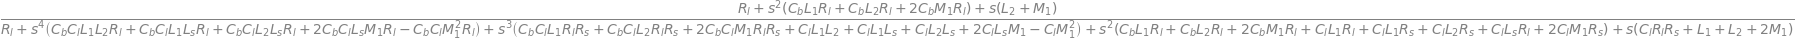

In [82]:
cancel(H1_sym,s)

In [83]:
sym1_num, sym1_denom = fraction(H1_sym,s) #returns numerator and denominator

### Characteristic equation

In [84]:
sym1_denom

In [85]:
cancel(sym1_denom,s)

Get the coefficients of the Laplace variable, s, from the [quadratic equation](https://en.wikipedia.org/wiki/Quadratic_equation):

$as^{2}+bs+c=0$



In [31]:
a = sym1_denom.coeff(s**2)
a

In [32]:
b = sym1_denom.coeff(s)
b

To find the c coefficient just subract off $bs$ and $cs^2$ from the quadratic equation.

In [33]:
c = sym1_denom - b*s - a*s**2
c

## Natural frequency and Q factor
The expressions for the [natural frequency](https://en.wikipedia.org/wiki/Natural_frequency) and [Q factor](https://en.wikipedia.org/wiki/Q_factor) are shown below:

$\omega _n = \sqrt {\frac {c}{a}}$

$Q = \omega _n \frac {a}{b}$

These xpressions have their orgin in classical mechanics describing [harmonic oscillators](https://en.wikipedia.org/wiki/Harmonic_oscillator) and are applicable to 2nd order electrical systems. 

The [damping ratio](https://en.wikipedia.org/wiki/Damping) is defined by the equation:  

$\zeta = \frac {1}{2Q}$


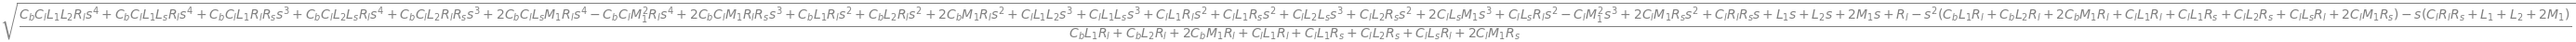

In [34]:
omega_n = sqrt(c/a)
omega_n

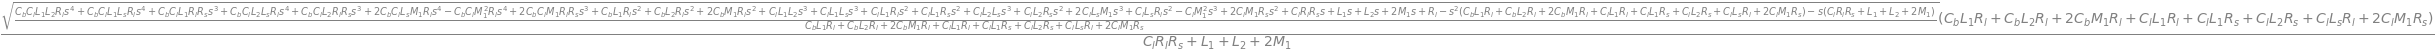

In [35]:
Q = (a/b)*omega_n
Q

## Circuit 2

![T coil ver 2](T-coil-ver2.png){#fig-t-coil2}  

From: @Razavi2015

change V1 to current source.


```
* C:\users\jeff64\My Documents\T-Coil\T-Coil-ver2.asc
V1 1 0 1
L1 2 1 1 Rser=0
L2 3 2 1 Rser=0
R1 4 3 1
C1 3 1 1
C2 2 0 1
V2 4 0 1
.op
K1 L1 L2 0.5
* ;.ac list 1
.backanno
.end

```

## Circuit 3

![T coil ver 3](T-coil-ver3.png){#fig-t-coil3}  

From: @Razavi2015


```
* C:\users\jeff64\My Documents\T-Coil\T-Coil-ver3.asc
V1 1 0 1
L1 2 1 1 Rser=0
L2 3 2 1 Rser=0
C1 2 0 1
C2 3 1 1
R1 3 0 1
K1 L1 L2 0.5
.op
.backanno
.end
```

### Load the netlist
The netlist generated by LTSpice is pasted into the cell below and some edits were made to remove the inductor series resistance and the independent sources are set to their DC values.

In [43]:
net_list3 = '''
V1 1 0 1
L1 2 1 1 
L2 3 2 1 
C1 2 0 1
C2 3 1 1
R1 3 0 1
K1 L1 L2 0.5
'''

Generate the network equations.

In [44]:
report, network3_df, network3_df2, A, X, Z = SymMNA.smna(net_list3)

# Put matricies into SymPy 
X = Matrix(X)
Z = Matrix(Z)

NE3_sym = Eq(A*X,Z)

Generate markdown text to display the network equations.

In [45]:
temp = ''
for i in range(len(X)):
    temp += '${:s}$<br>'.format(latex(Eq((A*X)[i:i+1][0],Z[i])))

Markdown(temp)

$C_{2} s v_{1} - C_{2} s v_{3} - I_{L1} + I_{V1} = 0$<br>$C_{1} s v_{2} + I_{L1} - I_{L2} = 0$<br>$- C_{2} s v_{1} + I_{L2} + v_{3} \left(C_{2} s + \frac{1}{R_{1}}\right) = 0$<br>$v_{1} = V_{1}$<br>$- I_{L1} L_{1} s - I_{L2} M_{1} s - v_{1} + v_{2} = 0$<br>$- I_{L1} M_{1} s - I_{L2} L_{2} s - v_{2} + v_{3} = 0$<br>

As shown above MNA generated many equations and these would be difficult to solve by hand and a symbolic soultion would take a lot of computing time. The equations are displace in matrix notation.

In [46]:
NE3_sym

⎡C₂⋅s⋅v₁ - C₂⋅s⋅v₃ - I_L1 + I_V1 ⎤       
⎢                                ⎥   ⎡0 ⎤
⎢     C₁⋅s⋅v₂ + I_L1 - I_L2      ⎥   ⎢  ⎥
⎢                                ⎥   ⎢0 ⎥
⎢                     ⎛       1 ⎞⎥   ⎢  ⎥
⎢-C₂⋅s⋅v₁ + I_L2 + v₃⋅⎜C₂⋅s + ──⎟⎥   ⎢0 ⎥
⎢                     ⎝       R₁⎠⎥ = ⎢  ⎥
⎢                                ⎥   ⎢V₁⎥
⎢               v₁               ⎥   ⎢  ⎥
⎢                                ⎥   ⎢0 ⎥
⎢-I_L1⋅L₁⋅s - I_L2⋅M₁⋅s - v₁ + v₂⎥   ⎢  ⎥
⎢                                ⎥   ⎣0 ⎦
⎣-I_L1⋅M₁⋅s - I_L2⋅L₂⋅s - v₂ + v₃⎦       

The symbols generated by the Python code are extraced by the SymPy function free_symbols and then declared as SymPy variables. 

In [47]:
# turn the free symbols into SymPy variables
var(str(NE3_sym.free_symbols).replace('{','').replace('}',''))

Built a dictionary of element values.

In [48]:
element_values = SymMNA.get_part_values(network3_df)
element_values

Generate the symbolic solution

In [49]:
U3_sym = solve(NE3_sym,X)

Display the symbolic solution

In [50]:
temp = ''
for i in U3_sym.keys():
    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U3_sym[i]))

Markdown(temp)

$v_{1} = V_{1}$<br>$v_{2} = \frac{C_{2} L_{1} R_{1} V_{1} s^{2} + C_{2} L_{2} R_{1} V_{1} s^{2} + 2 C_{2} M_{1} R_{1} V_{1} s^{2} + L_{2} V_{1} s + M_{1} V_{1} s + R_{1} V_{1}}{C_{1} C_{2} L_{1} L_{2} R_{1} s^{4} - C_{1} C_{2} M_{1}^{2} R_{1} s^{4} + C_{1} L_{1} L_{2} s^{3} + C_{1} L_{1} R_{1} s^{2} - C_{1} M_{1}^{2} s^{3} + C_{2} L_{1} R_{1} s^{2} + C_{2} L_{2} R_{1} s^{2} + 2 C_{2} M_{1} R_{1} s^{2} + L_{1} s + L_{2} s + 2 M_{1} s + R_{1}}$<br>$v_{3} = \frac{C_{1} C_{2} L_{1} L_{2} R_{1} V_{1} s^{4} - C_{1} C_{2} M_{1}^{2} R_{1} V_{1} s^{4} - C_{1} M_{1} R_{1} V_{1} s^{2} + C_{2} L_{1} R_{1} V_{1} s^{2} + C_{2} L_{2} R_{1} V_{1} s^{2} + 2 C_{2} M_{1} R_{1} V_{1} s^{2} + R_{1} V_{1}}{C_{1} C_{2} L_{1} L_{2} R_{1} s^{4} - C_{1} C_{2} M_{1}^{2} R_{1} s^{4} + C_{1} L_{1} L_{2} s^{3} + C_{1} L_{1} R_{1} s^{2} - C_{1} M_{1}^{2} s^{3} + C_{2} L_{1} R_{1} s^{2} + C_{2} L_{2} R_{1} s^{2} + 2 C_{2} M_{1} R_{1} s^{2} + L_{1} s + L_{2} s + 2 M_{1} s + R_{1}}$<br>$I_{V1} = \frac{- C_{1} C_{2} L_{1} L_{2} V_{1} s^{4} - C_{1} C_{2} L_{1} R_{1} V_{1} s^{3} - C_{1} C_{2} L_{2} R_{1} V_{1} s^{3} + C_{1} C_{2} M_{1}^{2} V_{1} s^{4} - 2 C_{1} C_{2} M_{1} R_{1} V_{1} s^{3} - C_{1} L_{2} V_{1} s^{2} - C_{1} R_{1} V_{1} s - C_{2} L_{1} V_{1} s^{2} - C_{2} L_{2} V_{1} s^{2} - 2 C_{2} M_{1} V_{1} s^{2} - V_{1}}{C_{1} C_{2} L_{1} L_{2} R_{1} s^{4} - C_{1} C_{2} M_{1}^{2} R_{1} s^{4} + C_{1} L_{1} L_{2} s^{3} + C_{1} L_{1} R_{1} s^{2} - C_{1} M_{1}^{2} s^{3} + C_{2} L_{1} R_{1} s^{2} + C_{2} L_{2} R_{1} s^{2} + 2 C_{2} M_{1} R_{1} s^{2} + L_{1} s + L_{2} s + 2 M_{1} s + R_{1}}$<br>$I_{L1} = \frac{- C_{1} C_{2} L_{2} R_{1} V_{1} s^{3} - C_{1} C_{2} M_{1} R_{1} V_{1} s^{3} - C_{1} L_{2} V_{1} s^{2} - C_{1} R_{1} V_{1} s - V_{1}}{C_{1} C_{2} L_{1} L_{2} R_{1} s^{4} - C_{1} C_{2} M_{1}^{2} R_{1} s^{4} + C_{1} L_{1} L_{2} s^{3} + C_{1} L_{1} R_{1} s^{2} - C_{1} M_{1}^{2} s^{3} + C_{2} L_{1} R_{1} s^{2} + C_{2} L_{2} R_{1} s^{2} + 2 C_{2} M_{1} R_{1} s^{2} + L_{1} s + L_{2} s + 2 M_{1} s + R_{1}}$<br>$I_{L2} = \frac{C_{1} C_{2} L_{1} R_{1} V_{1} s^{3} + C_{1} C_{2} M_{1} R_{1} V_{1} s^{3} + C_{1} M_{1} V_{1} s^{2} - V_{1}}{C_{1} C_{2} L_{1} L_{2} R_{1} s^{4} - C_{1} C_{2} M_{1}^{2} R_{1} s^{4} + C_{1} L_{1} L_{2} s^{3} + C_{1} L_{1} R_{1} s^{2} - C_{1} M_{1}^{2} s^{3} + C_{2} L_{1} R_{1} s^{2} + C_{2} L_{2} R_{1} s^{2} + 2 C_{2} M_{1} R_{1} s^{2} + L_{1} s + L_{2} s + 2 M_{1} s + R_{1}}$<br>

In [51]:
H3_sym = (U3_sym[v3]/U3_sym[v1]).simplify()

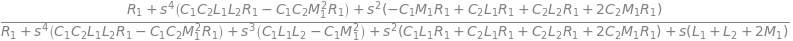

In [52]:
cancel(H3_sym,s)

In [53]:
sym3_num, sym3_denom = fraction(H3_sym,s) #returns numerator and denominator

In [61]:
cancel(sym3_num,s)

In [62]:
cancel(sym3_denom,s)

## Circuit 4

![T coil ver 4](T-coil-ver4.png){#fig-t-coil4}  

From: @Razavi2015


```
* C:\users\jeff64\My Documents\T-Coil\T-Coil-ver4.asc
L1 1 2 1 Rser=0
L2 3 1 1 Rser=0
R1 4 3 1
C1 3 2 1
V2 4 0 1
I1 1 0 1
R2 2 0 1
C2 1 0 1
.op
K1 L1 L2 0.5
* ;.ac list 1
.backanno
.end

```

## Summary
  